In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./230216_RawDataSet.csv', index_col=0)
df.columns = ['inlet','outlet','g','w']
df['before'] = df['w'].shift(1)
df['before'].iloc[0] = df['w'].iloc[0]

In [3]:

use_col = ['inlet','outlet','before']

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,use_col], df.loc[:,'w'], test_size=0.1,
                                                    random_state=42,shuffle=False)

In [4]:
y_test = y_test.tolist()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (459, 3)
Test data shape: (52, 3)


In [5]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:

mean_absolute_error(X_test['before'],y_test)
mean_squared_error(X_test['before'],y_test)


0.011267818400033729

* 이전 시점으로의 예측

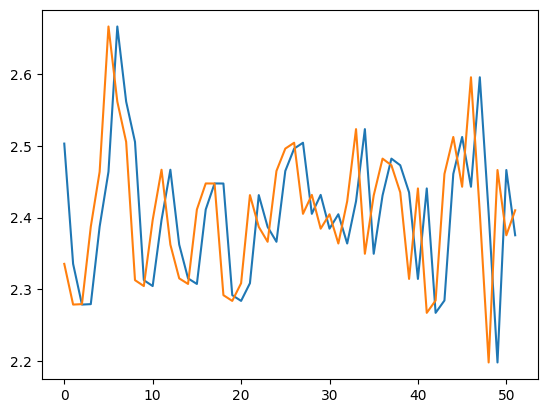

In [7]:
plt.plot(X_test['before'].tolist())
plt.plot(y_test)

In [8]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression()

In [9]:
y_predicted = line_fitter.predict(X_test)

* Linear Regression 으로 예측

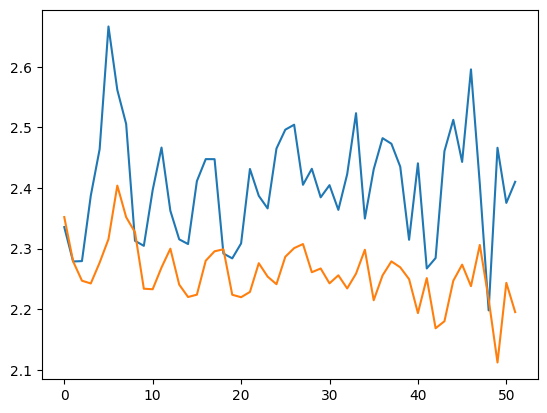

In [10]:
plt.plot(y_test)
plt.plot(y_predicted)


In [11]:
mean_absolute_error(y_predicted,y_test)
mean_squared_error(y_predicted,y_test)

0.03006100559201003

# train fit 확인

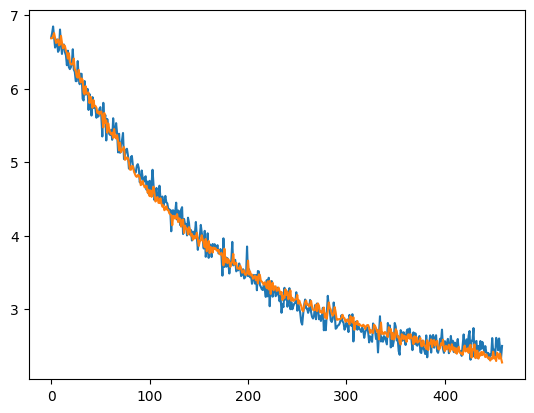

In [12]:
y_predicted_train = line_fitter.predict(X_train)

plt.plot(y_train.tolist())
plt.plot(y_predicted_train)

## XGB LGB 사용

In [13]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
y_pred = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)


In [15]:
mean_absolute_error(y_pred,y_test)
mean_squared_error(y_pred,y_test)

0.015156765163098817

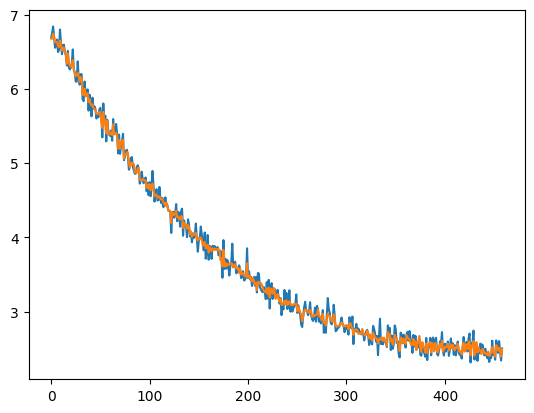

In [16]:
plt.plot(y_train.tolist())
plt.plot(y_pred_train)

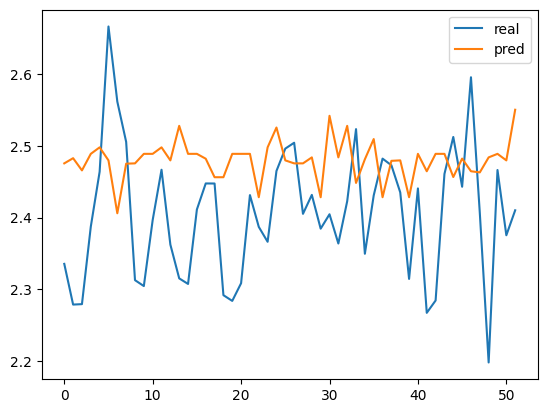

In [19]:

y_pred = xgb_model.predict(X_test)


plt.plot(y_test,label ='real')
plt.plot(y_pred,label ='pred')
plt.legend()
plt.show()

## 대안 

* 다른 모델 사용
* 데이터 noise 까지 학습되는 부분이 문제가 되는 것으로 확인 --> robust 모델 관점으로 접근